In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [22]:
spam=pd.read_csv('spam.csv')
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [23]:
spam.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [24]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [25]:
spam=spam[['v1','v2']]

In [26]:
spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [28]:
from nltk.stem.porter import PorterStemmer

porter_stemer=PorterStemmer()

In [29]:
def stem_words(v2):
    temp=[]
    v2=v2.split()
    for i in v2:
        result=porter_stemer.stem(i)
        temp.append(result)
    return temp     

In [30]:
spam['v2'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [31]:
stem_words('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

['go',
 'until',
 'jurong',
 'point,',
 'crazy..',
 'avail',
 'onli',
 'in',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet...',
 'cine',
 'there',
 'got',
 'amor',
 'wat...']

In [32]:
# Now apply to entire column
spam['v2']=spam['v2'].apply(stem_words)

In [33]:
spam.head()

,v1,v2
0,ham,"[go, until, jurong, point,, crazy.., avail, on..."
1,ham,"[ok, lar..., joke, wif, u, oni...]"
2,spam,"[free, entri, in, 2, a, wkli, comp, to, win, f..."
3,ham,"[u, dun, say, so, earli, hor..., u, c, alreadi..."
4,ham,"[nah, i, don't, think, he, goe, to, usf,, he, ..."


In [35]:
spam['v2']=spam['v2'].apply(lambda x:' '.join(x))

In [36]:
spam.head()

,v1,v2
0,ham,"go until jurong point, crazy.. avail onli in b..."
1,ham,ok lar... joke wif u oni...
2,spam,free entri in 2 a wkli comp to win fa cup fina...
3,ham,u dun say so earli hor... u c alreadi then say...
4,ham,"nah i don't think he goe to usf, he live aroun..."


In [37]:
X=spam['v2']
Y=spam['v1']

<Axes: xlabel='v1', ylabel='count'>

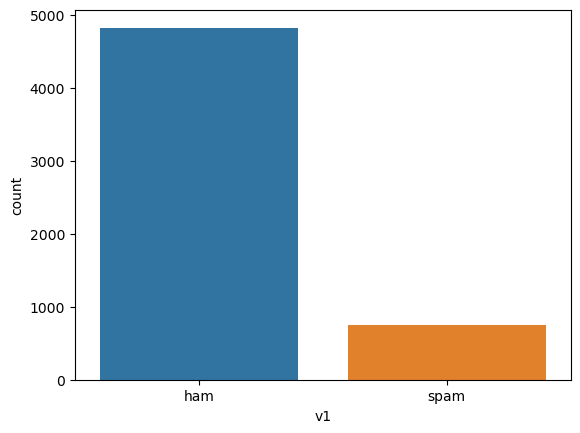

In [38]:
sns.countplot(data=spam,x='v1')

In [39]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [40]:
spam_wc=wc.generate(spam[spam['v1']=='spam']['v2'].str.cat(sep=""))

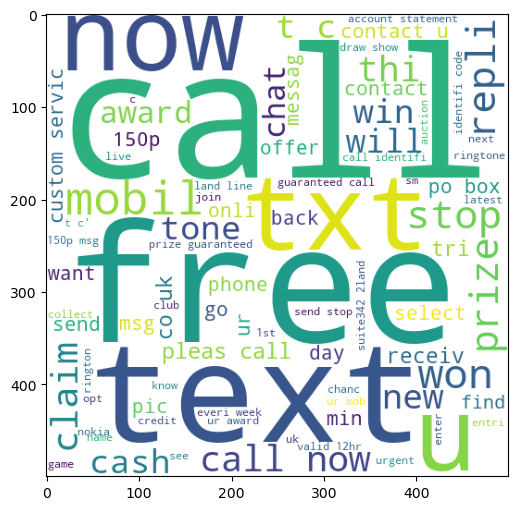

In [41]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [42]:
ham_wc=wc.generate(spam[spam['v1']=='ham']['v2'].str.cat(sep=""))

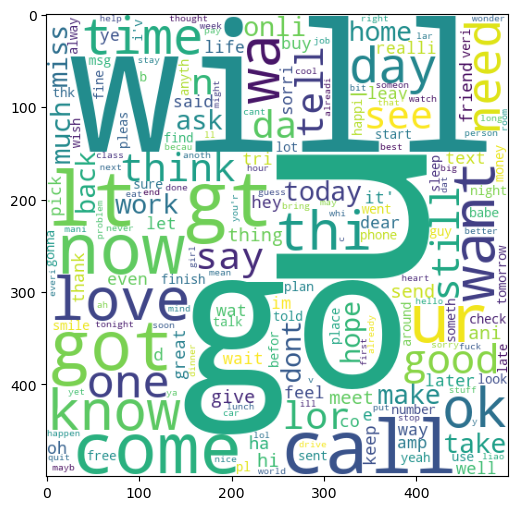

In [43]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

count_vector=CountVectorizer(max_features=500,stop_words='english')

In [45]:
count_vector.fit(spam['v2'])

CountVectorizer(max_features=500, stop_words='english')

In [46]:
arr_spam=count_vector.transform(spam['v2']).toarray()

In [47]:
arr_spam

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [48]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(arr_spam,Y,test_size=0.2)

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=8)

In [50]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=8)

In [51]:
predictions=knn.predict(X_test)
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [52]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(predictions,Y_test))

              precision    recall  f1-score   support

         ham       1.00      0.90      0.95      1064
        spam       0.33      1.00      0.50        51

    accuracy                           0.91      1115
   macro avg       0.67      0.95      0.72      1115
weighted avg       0.97      0.91      0.93      1115



In [53]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes=MultinomialNB()

In [54]:
naive_bayes.fit(X_train,Y_train)

MultinomialNB()

In [96]:
predictions=naive_bayes.predict(X_test)
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [97]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(predictions,Y_test))

              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       958
        spam       0.92      0.90      0.91       157

    accuracy                           0.97      1115
   macro avg       0.95      0.94      0.95      1115
weighted avg       0.97      0.97      0.97      1115



In [57]:
# Testing the above model manually

In [58]:
spam['v2'][0]

'go until jurong point, crazy.. avail onli in bugi n great world la e buffet... cine there got amor wat...'

In [62]:
v2='go until jurong point, crazy.. avail onli in bugi n great world la e buffet... cine there got amor wat...'
v2

'go until jurong point, crazy.. avail onli in bugi n great world la e buffet... cine there got amor wat...'

In [63]:
v2=pd.Series(v2)
v2

0    go until jurong point, crazy.. avail onli in b...
dtype: object

In [64]:
v2=count_vector.transform(v2).toarray()
v2

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [65]:
naive_bayes.predict(v2)

array(['ham'], dtype='<U4')

In [66]:
import pickle
import joblib

In [67]:
pickle.dump(naive_bayes,open('Spam Model.sav','wb'))

In [69]:
joblib.dump(count_vector,'Vector Spam Model.joblib')

['Vector Spam Model.joblib']

In [70]:
# Tkinter model

In [1]:
import tkinter as tk
import joblib
import pickle
import pandas as pd
from nltk.stem.porter import PorterStemmer

root=tk.Tk()
root.title("Spam model")
root.geometry('700x650')
root.config(bg='#d9d9d9')

def spam_prediction():
    v2=v1_input.get(0.0,tk.END)

    v2 = v2

    porter_stemer = PorterStemmer()

    temp=[]
    for i in v2:
        result=porter_stemer.stem(i)
        temp.append(result)

    v2=' '.join(temp)
    temp.clear()

    v2 = pd.Series(v2)
    vector_spam_model = joblib.load('Vector Spam Model.joblib')
    v2_model = pickle.load(open('Spam Model.sav', 'rb'))
    v2 = vector_spam_model.transform(v2)
    prediction = v2_model.predict(v2)
    output.config(text=prediction[0].capitalize())

heading=tk.Label(text='Spam or Ham',font=('Kristen ITC',50),fg='#ef233c',bg='#d9d9d9')
heading.grid(row=1,column=1,columnspan=2,padx=80,pady=20)

tk.Label(text='v1: ',font=('Kristen ITC',25),bg='#d9d9d9').grid(row=2,column=1,columnspan=2)

# Use text instead of entry to give border to the box
v1_input=tk.Text(font=('Arial',15),width=55,height=6,relief='solid')
v1_input.grid(row=3,column=1,columnspan=2)

btn=tk.Button(text='Predict',font=('Kristen ITC',20,'bold'),bg='#ef233c',fg='white',width=36,relief='solid',command=spam_prediction)
btn.grid(row=4,column=1,columnspan=2,pady=15)

output=tk.Label(text='',font=('Kristen ITC',50),fg='#ef233c',bg='#d9d9d9')
output.grid(row=5,column=1,columnspan=2,padx=80,pady=10)

root.mainloop()

In [92]:
spam['v2'][2]

"free entri in 2 a wkli comp to win fa cup final tkt 21st may 2005. text fa to 87121 to receiv entri question(std txt rate)t&c' appli 08452810075over18'"